# [Three dimensional data](https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html)

Earth's surface temperature is a three dimensional variable. The means that the value of the varaible, *temperature*, is going to depend on it's location in space (*latitude*, *longitude*) and when in *time* temperature was measured. Latitude, longitude, and time are the *dimensions* that temperature exists within. Here is one way of visualizing 3-dimensional datasets.

![xarray dataset diagram](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

This notebook introduces the python package `xarray` which is very useful for working with 3-dimensional data (and also any *multidimensional* datasets).

Before we get started, we need to install a package `netcdf4` with the [package installer, pip](https://packaging.python.org/en/latest/tutorials/installing-packages/#use-pip-for-installing). In your command line, enter the following commands, hitting your `enter` key after each line.
```
$ py -m pip --version
$ py -m pip install xarray netcfd4
```

## Opening a 3D dataset

For today, we'll use the [Berkeley Earth Global Gridded Data, 1º x 1º Latitude-Longitude Grid (~400 MB)](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Gridded/Land_and_Ocean_LatLong1.nc). Download that file and move it to your `data` folder.

After you've got the file in the right location, let's open up the file and see what's inside.

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# load data
fname_in = '../data/Land_and_Ocean_LatLong1.nc'
DS = xr.open_dataset(fname_in,engine='netcdf4')

In [4]:
360*180

64800

In [5]:
# view the dataset
DS

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2093, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               11-Jul-2024 02:09:01
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   08-Jul-2024 10:18:28
    ocean_source_history:  16-Jun-2024 08:23:06
    comment:               This file contains Berkeley Earth surface temperat...

Here we've opened the netcdf file from Berkeley Earth as an `xarray` dataset. Like Pandas, xarray has two fundamental data structures:
* a `DataArray`, which holds a single multi-dimensional variable and its coordinates
* a `Dataset`, which holds multiple variables that potentially share the same coordinates

A `DataArray` has four essential attributes:
* `values`: a `numpy.ndarray` holding the array’s values
* `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`)
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

A `DataSet` holds a collection of `DataArrays` which potentially can share coordinates. 

In this case, because the file contains multiple variables, we've opened it as a `Dataset`. Let's explore each part of the `Dataset`.

### Attributes

In [6]:
DS.attrs

{'Conventions': 'Berkeley Earth Internal Convention (based on CF-1.5)',
 'title': 'Native Format Berkeley Earth Surface Temperature Anomaly Field',
 'history': '11-Jul-2024 02:09:01',
 'institution': 'Berkeley Earth Surface Temperature Project',
 'land_source_history': '08-Jul-2024 10:18:28',
 'ocean_source_history': '16-Jun-2024 08:23:06',
 'comment': 'This file contains Berkeley Earth surface temperature anomaly field in our native equal-area format.'}

In [7]:
DS.attrs['title']

'Native Format Berkeley Earth Surface Temperature Anomaly Field'

In [8]:
DS.attrs['institution']

'Berkeley Earth Surface Temperature Project'

In [9]:
DS.attrs['comment']

'This file contains Berkeley Earth surface temperature anomaly field in our native equal-area format.'

### Dimensions

In [8]:
# View the dimensions
DS.dims

Frozen({'longitude': 360, 'latitude': 180, 'time': 2093, 'month_number': 12})

In [10]:
DS.

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2093, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0
    temperature  (time, latitude, longitude) float32 nan nan nan ... 2.977 2.975
    climatology  (month_number, latitude, longitude) float32 -27.95 ... -31.26
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               11-Jul-2024 02:09:01
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   08-Jul-2024 10:18:28
    ocean_source_history:  16-Jun-2024 08:23:06
    comment:               This file contains Berkeley Earth surface temperat...

### Coordinates

In [10]:
DS.coords

Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) float64 1.85e+03 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03

In [12]:
DS.coords.variables

Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      Longitude, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.

In [15]:
DS.coords.variables['longitude'].item

<bound method _values_method_wrapper.<locals>.func of <xarray.IndexVariable 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      Longitude>

In [16]:
DS.variables['longitude']

<xarray.IndexVariable 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      Longitude

In [18]:
DS.time

<xarray.DataArray 'time' (time: 2093)>
array([1850.041667, 1850.125   , 1850.208333, ..., 2024.208333, 2024.291667,
       2024.375   ])
Coordinates:
  * time     (time) float64 1.85e+03 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Attributes:
    units:          year A.D.
    standard_name:  time
    long_name:      Time

### Variables

In [17]:
DS['temperature']

<xarray.DataArray 'temperature' (time: 2093, latitude: 180, longitude: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[-0.791259, -0.789903, ..., -0.7941  , -0.792658],
        [-0.477622, -0.474606, ..., -0.484095, -0.480785],
        ...,
        [ 2.432879,  2.439417, ...,  2.41992 ,  2.42638 ],
        [ 2.547533,  2.550282, ...,  2.542112,  2.54481 ]],

       [[ 2.29337 ,  2.294782, ...,  2.290609,  2.291979],
        [ 2.162743,  2.166783, ...,  2.15484 ,  2.158761],
        ...,
        [ 2.966247,  2.962533, ...,  2.973706,  2.96997 ],
        [ 2.973679,  2.972194, ...,  2.976632,  2.975158]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) float64 1.85e+03 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.010550544126346
    valid_max:      25.20734464914045

In [20]:
DS.climatology

<xarray.DataArray 'climatology' (month_number: 12, latitude: 180, longitude: 360)>
array([[[-27.95452 , -27.939024, ..., -27.985193, -27.970291],
        [-30.08325 , -30.111477, ..., -30.082138, -30.074507],
        ...,
        [-33.861084, -33.86397 , ..., -33.866497, -33.861923],
        [-33.69418 , -33.69592 , ..., -33.69841 , -33.695007]],

       [[-39.91434 , -39.892986, ..., -39.9571  , -39.936096],
        [-40.995945, -40.991516, ..., -41.017162, -41.005074],
        ...,
        [-34.250153, -34.25752 , ..., -34.236385, -34.24273 ],
        [-34.27386 , -34.267254, ..., -34.270355, -34.271763]],

       ...,

       [[-37.633434, -37.617413, ..., -37.66543 , -37.649822],
        [-39.010834, -39.02743 , ..., -39.014168, -39.007248],
        ...,
        [-27.45418 , -27.454605, ..., -27.460854, -27.456263],
        [-27.34832 , -27.349094, ..., -27.351997, -27.349287]],

       [[-27.28443 , -27.271486, ..., -27.309963, -27.297636],
        [-29.523739, -29.561378, ..., -29.514149, -29.50914 ],
        ...,
        [-31.483852, -31.48759 , ..., -31.490517, -31.484825],
        [-31.259094, -31.261496, ..., -31.264128, -31.259972]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: month_number
Attributes:
    units:          degree C
    standard_name:  surface_temperature_climatology
    long_name:      Air Surface Temperature Climatology (Jan 1951 - Dec 1980)
    valid_min:      -68.729679551074
    valid_max:      37.91595069783475

In [21]:
DS['temperature']['time']

<xarray.DataArray 'time' (time: 2093)>
array([1850.041667, 1850.125   , 1850.208333, ..., 2024.208333, 2024.291667,
       2024.375   ])
Coordinates:
  * time     (time) float64 1.85e+03 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Attributes:
    units:          year A.D.
    standard_name:  time
    long_name:      Time

In [22]:
DS.climatology.month_number

<xarray.DataArray 'month_number' (month_number: 12)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)
Dimensions without coordinates: month_number

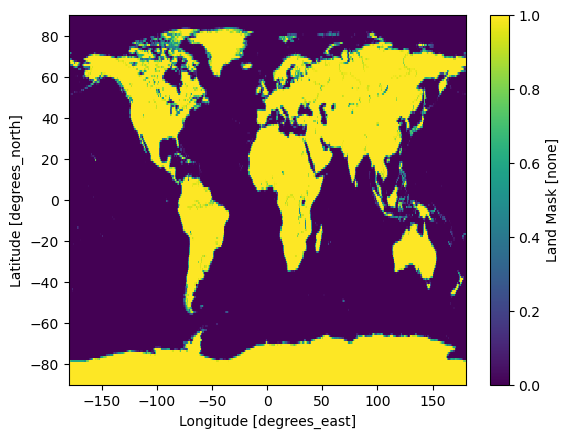

In [24]:
DS['land_mask'].plot()

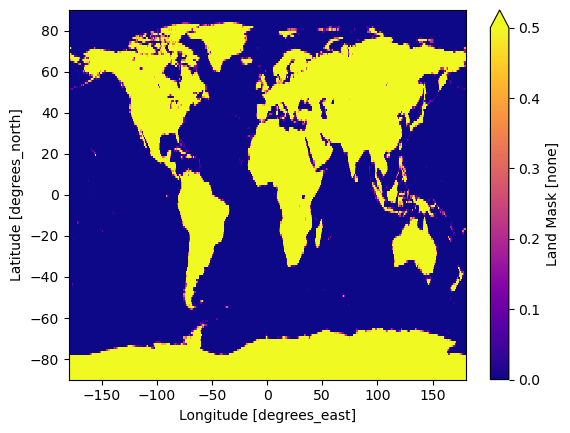

In [26]:
DS['land_mask'].plot(cmap='plasma', vmax=0.5)

[]

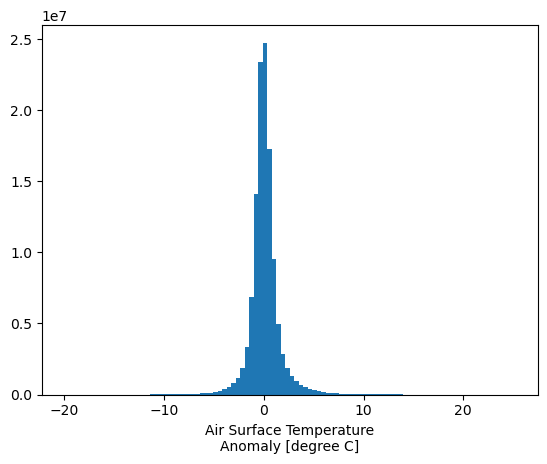

In [29]:
DS['temperature'].plot.hist(bins=100)
plt.plot()

### Quick plotting

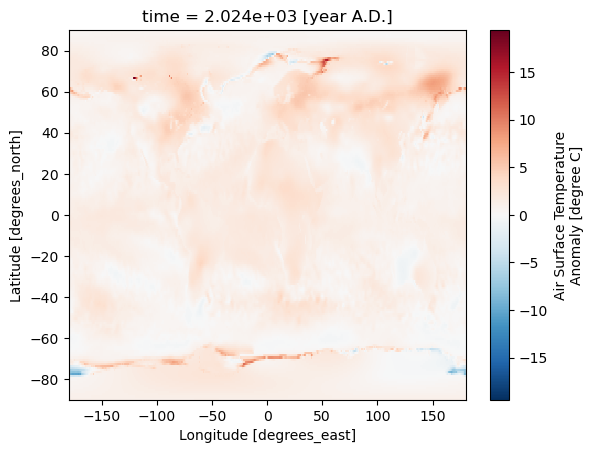

In [17]:
DS.temperature.isel(time=-1).plot()

### Assignment

Look through the dataset and identify the three variables. What are the dimensions of each variable? Which dimensions do they share? Which are different? Why do you think that is?

Bonus, using the sample code from the quick plotting section, plot one month (your choice which) of the `climatology` variable.

In [ ]:
DS.temperature.isel(time=-1).plot()